<a href="https://colab.research.google.com/github/raheelsiddiqi2013/fruit-grading/blob/main/LocalSindhiGradingThirdNotebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Grading of Local Sindhi Guava
This notebook is written and executed by **Raheel Siddiqi, PhD**. Fruit grading of **Local Sindhi** guava is performed. It is a multi-class classification problem with three classes: "Green", "Mature Green", and "Ripe". The dataset consists of 711 images with a train-validation-test split of 70-15-15. The pre-trained VGG16 model is used for feature extraction, while a densely connected network is used for final classification. A test set classification accuracy of **96.88%** has been achieved.

## Connecting to Google Drive

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
!ls "/content/drive/MyDrive/MyResearch/FruitGrading/LocalSindhi"

Test  Train  Validation


## Importing Relevant Libraries

In [3]:
# Import
import numpy as np
from PIL import Image
import os

from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.applications import VGG16
import matplotlib.pyplot as plt
%matplotlib inline

## Loading Data

In [20]:
# Create Generator
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2
                                   )

validation_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)


# Create Data Loaders
train_loader = train_datagen.flow_from_directory(
    directory = "/content/drive/MyDrive/MyResearch/FruitGrading/LocalSindhi/Train",
    target_size = (224, 224),
    batch_size = 32,
    shuffle = True
)

validation_loader= validation_datagen.flow_from_directory(
    directory = "/content/drive/MyDrive/MyResearch/FruitGrading/LocalSindhi/Validation",
    target_size = (224, 224),
    batch_size = 32,
    shuffle = True
)

test_loader = test_datagen.flow_from_directory(
    directory = "/content/drive/MyDrive/MyResearch/FruitGrading/LocalSindhi/Test",
    target_size = (224, 224),
    batch_size = 32,
    shuffle = True
)

Found 498 images belonging to 3 classes.
Found 107 images belonging to 3 classes.
Found 106 images belonging to 3 classes.


## Sample Dataset Images

In [47]:
def plotImages(images_arr,label_arr,rev_look_up):
  fig,axes=plt.subplots(3,3)
  axes=axes.flatten()
  for img,label,ax in zip(images_arr,label_arr,axes):
    ax.imshow(img)
    ax.set_title(rev_look_up[np.argmax(label)])
    ax.axis('off')
  plt.tight_layout()
  plt.show()

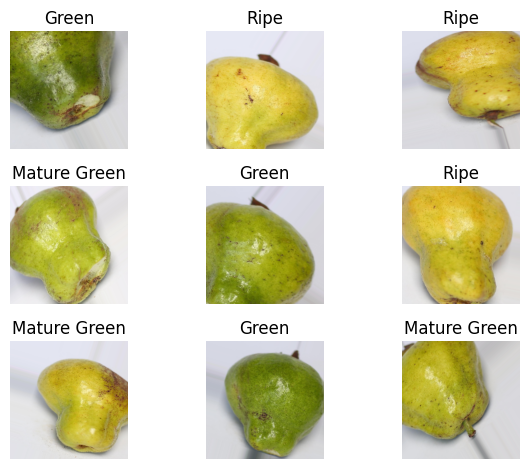

In [48]:
imgs, labels = train_loader[0]
reverse_lookup={val:key for key, val in dict(train_loader.class_indices).items()}
plotImages(imgs,labels,reverse_lookup)

## Dataset Classes

In [ ]:
train_loader.class_indices

{'Green': 0, 'Mature Green': 1, 'Ripe': 2}

## Hyperparameter Settings and Model Compilation

In [ ]:
from keras.callbacks import ModelCheckpoint
import keras

optimizer = keras.optimizers.Adam(lr=0.0001)
model = Sequential()
model.add(VGG16(include_top = False, pooling = "avg"))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer=optimizer,metrics=['categorical_accuracy'])

filepath="LocalSindhi_VGG16_model_2.h5"
checkpoint = ModelCheckpoint(filepath, monitor="val_loss", save_best_only=True)
callbacks_list = [checkpoint]

## Model Training

In [ ]:
import math

model_train_history = model.fit_generator(
    generator = train_loader,
    steps_per_epoch = math.ceil(498//32),
    epochs = 100,
    callbacks=callbacks_list,
    validation_data = validation_loader,
    validation_steps = math.ceil(107//32)
)

<ipython-input-7-6e726d79eb7f>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model_train_history = model.fit_generator(


Epoch 1/100
15/15 [==============================] - ETA: 0s - loss: 2.1749 - categorical_accuracy: 0.4764

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


15/15 [==============================] - 50s 2s/step - loss: 2.1749 - categorical_accuracy: 0.4764 - val_loss: 1.0129 - val_categorical_accuracy: 0.4792
Epoch 2/100
15/15 [==============================] - 15s 984ms/step - loss: 1.0052 - categorical_accuracy: 0.5104 - val_loss: 0.9976 - val_categorical_accuracy: 0.5000
Epoch 3/100
15/15 [==============================] - 15s 986ms/step - loss: 0.9870 - categorical_accuracy: 0.5107 - val_loss: 0.9894 - val_categorical_accuracy: 0.5104
Epoch 4/100
15/15 [==============================] - 13s 878ms/step - loss: 0.9901 - categorical_accuracy: 0.5000 - val_loss: 1.0661 - val_categorical_accuracy: 0.4688
Epoch 5/100
15/15 [==============================] - 14s 958ms/step - loss: 0.9983 - categorical_accuracy: 0.5043 - val_loss: 1.0027 - val_categorical_accuracy: 0.5000
Epoch 6/100
15/15 [==============================] - 13s 878ms/step - loss: 0.9968 - categorical_accuracy: 0.4957 - val_loss: 0.9990 - val_categorical_accuracy: 0.5104
Epoch 7

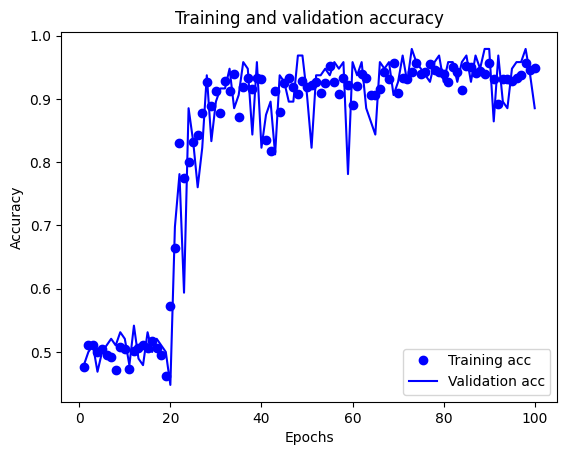

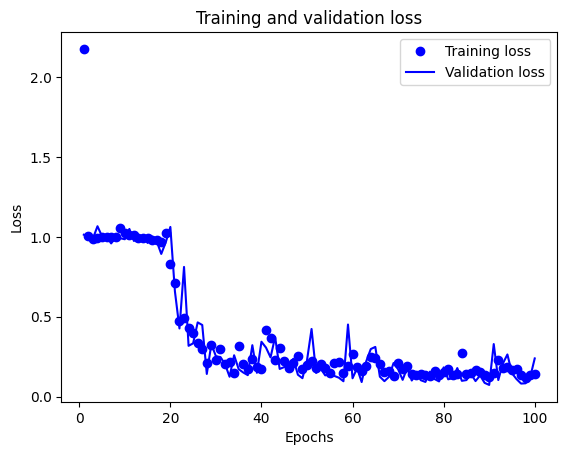

In [ ]:
acc=model_train_history.history['categorical_accuracy']
val_acc=model_train_history.history['val_categorical_accuracy']
loss=model_train_history.history['loss']
val_loss=model_train_history.history['val_loss']
epochs=range(1,len(acc)+1)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Model Testing

In [ ]:
from keras.models import load_model
best_model = load_model('LocalSindhi_VGG16_model_2.h5')
steps_test=int(106/32)
result = best_model.evaluate_generator(test_loader, steps=steps_test,verbose=1)
print("Test-set accuracy: {0:.2%}".format(result[1]))

<ipython-input-9-f06c8c1ecc67>:4: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  result = best_model.evaluate_generator(test_loader, steps=steps_test,verbose=1)


3/3 [==============================] - 17s 8s/step - loss: 0.0900 - categorical_accuracy: 0.9688
Test-set accuracy: 96.88%
